# HOTEL CANCELLATION pREDICTION

In [42]:
#importing the basic library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

In [28]:
# reading the CSV file to python

hotel = pd.read_csv("C:/Users/Rohini Kanungo/Downloads/hotel_bookings.csv/hotel_bookings.csv")

In [29]:
# view the data: gives us the first 5 rows of data
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [30]:
hotel['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [31]:
# checking the summary statistics of data
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [32]:
#shape of the dataset

hotel.shape

(119390, 32)

In [33]:
#checking the data information
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [34]:
#calculating the missing value in each column
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [35]:
#commpany column in dataset has maximum no of null values
# so we remove the column  
hotel= hotel.drop(['company'],axis=1)

In [36]:
#removing all the row having missing value
hotel= hotel.dropna(axis=0)

In [37]:
# again checking the missing value 
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [38]:
#checking the unique value of hotel
hotel['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [77]:
#checking the data type for all feature in dataset  
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

In [78]:
#converting the required object type feature to categorical
categorical_features = ['hotel','is_canceled','arrival_date_week_number','meal','country','market_segment',
                        'distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',
                        'deposit_type','agent','customer_type','reservation_status','arrival_date_month']


# Data visualization

In [ ]:
#Let's answer the following questions with visualization

#How lead time affects cancellation?
#Which type of hotel has more cancellation?
#Which week of the year experiences more bookings?

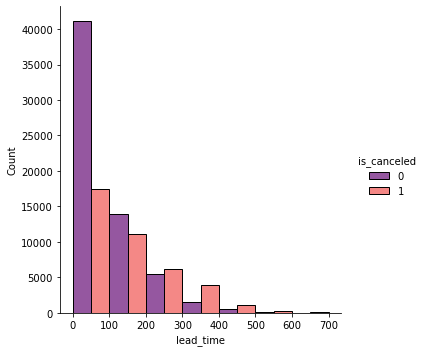

In [43]:
#How lead time affects cancellation?

sns.displot(hotel,x='lead_time',hue ='is_canceled',binwidth=100,multiple='dodge',palette='magma')

#With increasing lead time the number of bookings canceled is increasing when compared to bookings which are not canceled

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

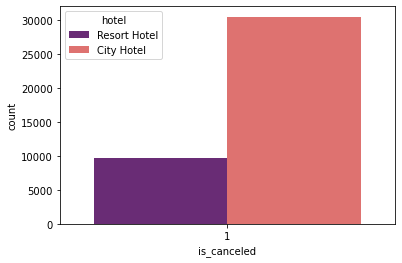

In [48]:
#Which type of hotel has more cancellation?

canceled_count = hotel[hotel['is_canceled'] == 1]
sns.countplot(data = canceled_count,x='is_canceled',hue='hotel',palette='magma')

#city hotel had most of bookings as cancelled

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

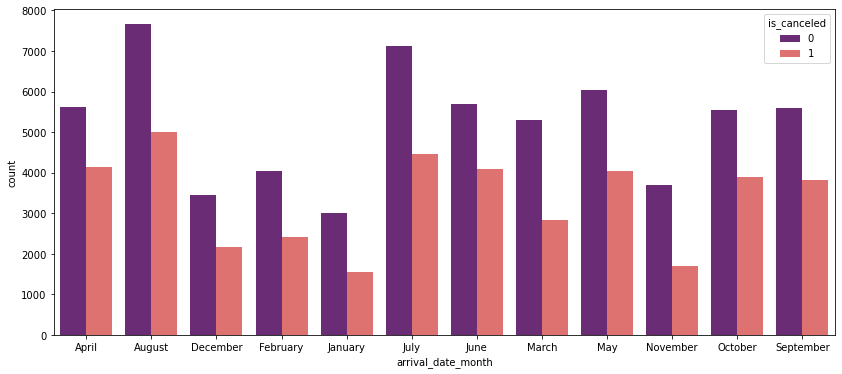

In [101]:
# which month had most no of bookings

plt.figure(figsize=(14,6))
sns.countplot(data = hotel,x='arrival_date_month',hue='is_canceled',palette='magma')
# 2nd and 3rd quarter had the most bookings canacelled.


<AxesSubplot:xlabel='arrival_date_month', ylabel='is_canceled'>

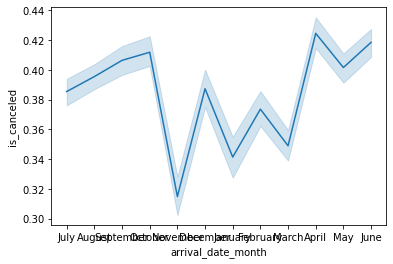

In [55]:
sns.lineplot(data=hotel, x="arrival_date_month", y="is_canceled")

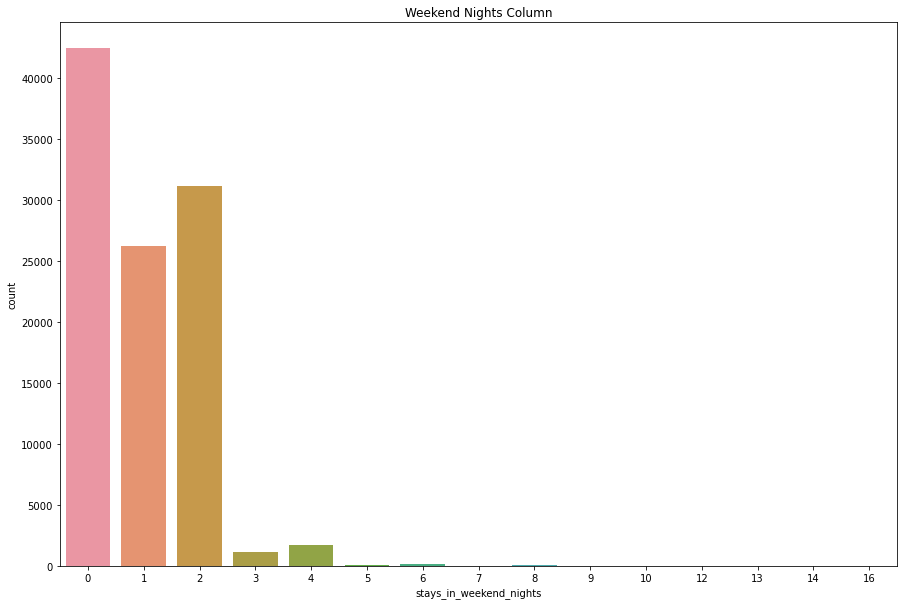

In [62]:
#stays_in_weekend_nights

#So most people actually don't stay overnight during weekends, but there are people who basically lived in the hotel for a few weeks.
plt.figure(figsize=(15, 10))
plt.title("Weekend Nights Column")
sns.countplot(x=hotel['stays_in_weekend_nights'])
plt.show()



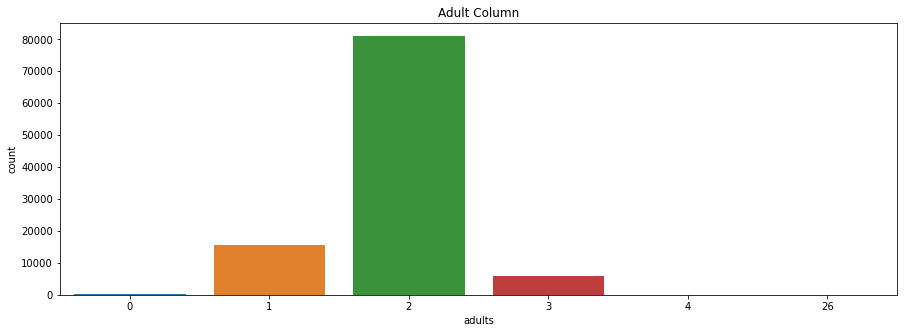

In [76]:
plt.figure(figsize=(15, 5))
plt.title("Adult Column")
sns.countplot(x=hotel['adults'])
plt.show()

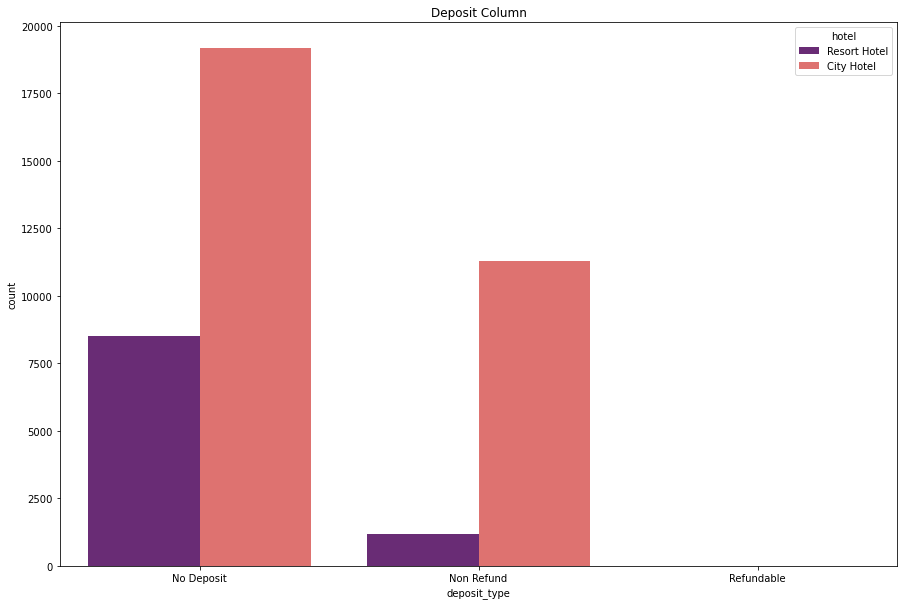

In [75]:
plt.figure(figsize=(15, 10))
plt.title("Deposit Column")
canceled_count = hotel[hotel['is_canceled'] == 1]
sns.countplot(data = canceled_count,x='deposit_type',hue='hotel',palette='magma')

plt.show()



# no deposit are high likely to get cancelled

In [79]:
hotel[categorical_features]=hotel[categorical_features].astype('category')

In [80]:
# checking the converted data type
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           102894 non-null  category
 1   is_canceled                     102894 non-null  category
 2   lead_time                       102894 non-null  int64   
 3   arrival_date_year               102894 non-null  int64   
 4   arrival_date_month              102894 non-null  category
 5   arrival_date_week_number        102894 non-null  category
 6   arrival_date_day_of_month       102894 non-null  int64   
 7   stays_in_weekend_nights         102894 non-null  int64   
 8   stays_in_week_nights            102894 non-null  int64   
 9   adults                          102894 non-null  int64   
 10  children                        102894 non-null  float64 
 11  babies                          102894 non-null  int64   
 12  me

In [81]:
hotel['meal'].unique()

[BB, FB, HB, SC, Undefined]
Categories (5, object): [BB, FB, HB, SC, Undefined]

<AxesSubplot:xlabel='meal', ylabel='count'>

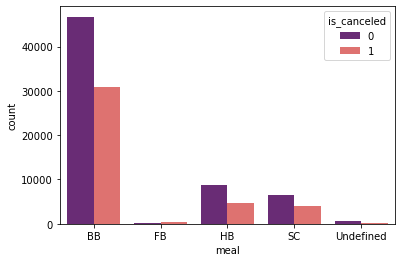

In [82]:
sns.countplot(data = hotel,x='meal',hue='is_canceled',palette='magma')

In [83]:
# seperating the dataset into features and target variables
y=hotel['is_canceled']

In [84]:
y

3         0
4         0
5         0
7         0
8         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 102894, dtype: category
Categories (2, int64): [0, 1]

In [85]:
X = hotel.drop(['is_canceled','reservation_status_date'],axis=1)

In [86]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out
5,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out
7,Resort Hotel,9,2015,July,27,1,0,2,2,0.0,...,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out
8,Resort Hotel,85,2015,July,27,1,0,3,2,0.0,...,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled


In [87]:
X_dum

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,...,agent-510.0,agent-526.0,agent-527.0,agent-531.0,agent-535.0,customer_type-Group,customer_type-Transient,customer_type-Transient-Party,reservation_status-Check-Out,reservation_status-No-Show
3,13,2015,1,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,14,2015,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,14,2015,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,9,2015,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,85,2015,1,0,3,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,30,2,5,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
119386,102,2017,31,2,5,3,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
119387,34,2017,31,2,5,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
119388,109,2017,31,2,5,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [88]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test= train_test_split(X_dum,y, test_size=.25,random_state=40)

In [90]:
X_train

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,...,agent-510.0,agent-526.0,agent-527.0,agent-531.0,agent-535.0,customer_type-Group,customer_type-Transient,customer_type-Transient-Party,reservation_status-Check-Out,reservation_status-No-Show
62810,59,2017,23,1,1,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
60440,58,2016,11,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
118566,207,2017,12,4,6,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
65878,202,2017,9,2,1,2,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
103778,36,2016,28,0,4,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67049,233,2017,27,2,3,3,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
108930,48,2017,1,2,1,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
94019,25,2016,29,0,1,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39004,62,2017,1,0,4,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [91]:
# preparing a logistic regression model
from sklearn.linear_model import LogisticRegression

In [92]:
logistic=LogisticRegression()

In [93]:
logistic.fit(X_train,y_train)

C:\Users\Rohini Kanungo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
#predicting the test data
y_pred= logistic.predict(X_test)

In [95]:
# calculating the  accuracy, precision,recall and f1-score for logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [96]:
accuracy_score(y_test,y_pred)

1.0

In [97]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     15773\n           1       1.00      1.00      1.00      9951\n\n    accuracy                           1.00     25724\n   macro avg       1.00      1.00      1.00     25724\nweighted avg       1.00      1.00      1.00     25724\n'

In [98]:
#calculating the ROC and AUC  for the logistics regression
from sklearn.metrics import roc_curve,roc_auc_score

In [99]:
roc_curve(y_test,y_pred)

(array([0., 0., 1.]), array([0., 1., 1.]), array([2, 1, 0], dtype=int64))

In [100]:
roc_auc_score(y_test,y_pred)

1.0